In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import shap

In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [3]:
file_path = r"C:\Users\HP\Documents\Volcanoe\Labeled Kilauea Volcanoe Data.csv"
df = pd.read_csv(file_path)

In [4]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (18169, 17)

First 5 rows:
   latitude  longitude  brightness  scan  track eruption_date  acq_time  \
0   19.4156  -155.4116       308.7   1.0    1.0    2003-02-24       837   
1   19.4142  -155.4210       320.6   1.0    1.0    2003-02-24       837   
2   19.4245  -155.4130       315.9   1.0    1.0    2003-02-24       837   
3   19.4231  -155.4224       345.6   1.0    1.0    2003-02-24       837   
4   19.4218  -155.4319       348.9   1.0    1.0    2003-02-24       837   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          71      6.2       283.8  10.5        N     0   
1     Terra      MODIS         100      6.2       284.8  20.9        N     0   
2     Terra      MODIS          86      6.2       286.4  15.9        N     0   
3     Terra      MODIS         100      6.2       290.3  56.5        N     0   
4     Terra      MODIS         100      6.2       288.0  63.4        N     0   

   year  label  
0  2003  

In [5]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18169 entries, 0 to 18168
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       18169 non-null  float64
 1   longitude      18169 non-null  float64
 2   brightness     18169 non-null  float64
 3   scan           18169 non-null  float64
 4   track          18169 non-null  float64
 5   eruption_date  18169 non-null  object 
 6   acq_time       18169 non-null  int64  
 7   satellite      18169 non-null  object 
 8   instrument     18169 non-null  object 
 9   confidence     18169 non-null  int64  
 10  version        18169 non-null  float64
 11  bright_t31     18169 non-null  float64
 12  frp            18169 non-null  float64
 13  daynight       18169 non-null  object 
 14  type           18169 non-null  int64  
 15  year           18169 non-null  int64  
 16  label          18169 non-null  int64  
dtypes: float64(8), int64(5), object(4)
mem

In [6]:
print("\nSummary Statistics:")
print(df.describe(include="all"))


Summary Statistics:
            latitude     longitude    brightness          scan         track  \
count   18169.000000  18169.000000  18169.000000  18169.000000  18169.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       19.407506   -155.283642    346.984567      1.831664      1.294865   
std         0.016158      0.022595     36.243387      0.920343      0.265237   
min        19.364300   -155.500000    300.000000      1.000000      1.000000   
25%        19.402200   -155.288200    319.700000      1.100000      1.100000   
50%        19.406000   -155.281600    337.800000      1.400000      1.200000   
75%        19.410000   -155.275100    366.900000      2.300000      1.500000   
max        19.599600   -155.220400    508.900000      4.800000      2.000000   

       eruption_da

In [7]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
latitude         0
longitude        0
brightness       0
scan             0
track            0
eruption_date    0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type             0
year             0
label            0
dtype: int64


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="eruption", data=df, palette="Set2")
plt.title("Target Variable Distribution (Eruption vs No Eruption)")
plt.xlabel("Eruption")
plt.ylabel("Count")
plt.show()

ValueError: Could not interpret input 'eruption'

<Figure size 600x400 with 0 Axes>

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


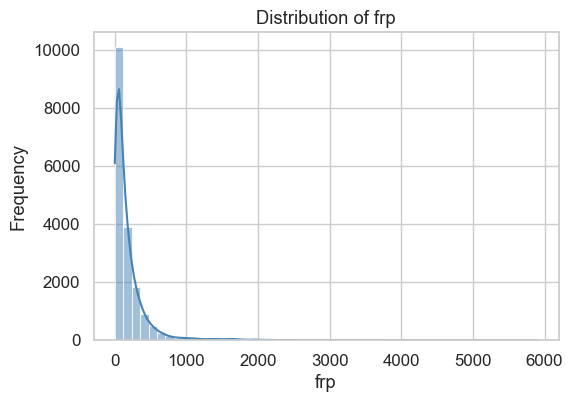

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


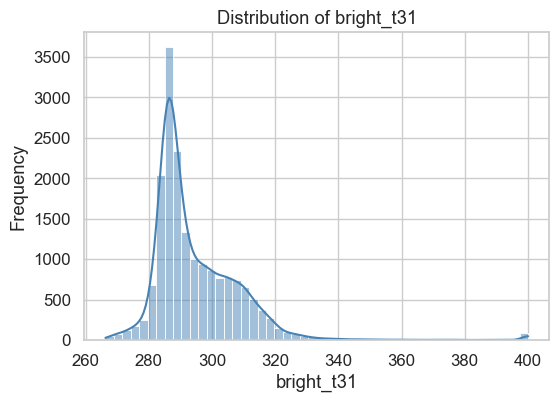

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


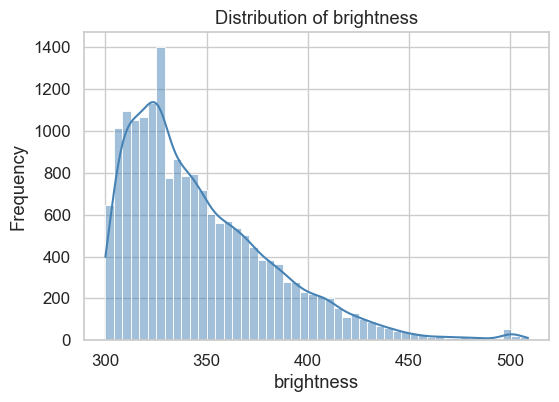

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


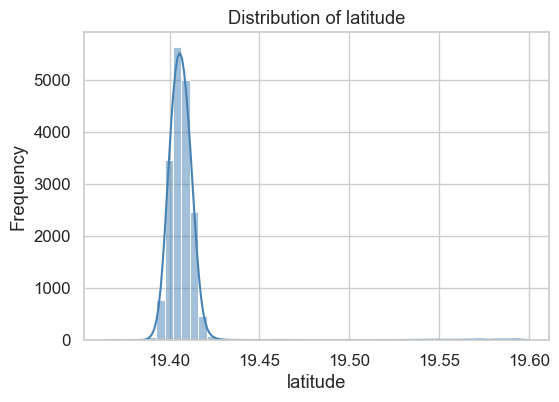

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


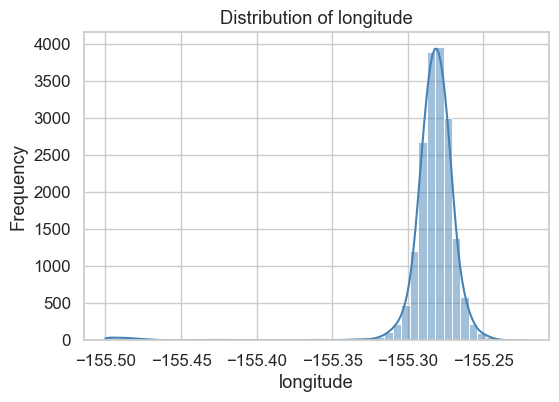

In [9]:
num_cols = ["frp", "bright_t31", "brightness", "latitude", "longitude"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
plt.figure(figsize=(8,6))
corr = df[num_cols + ["eruption"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

KeyError: "['eruption'] not in index"

<Figure size 800x600 with 0 Axes>

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="frp", y="bright_t31", hue="eruption", data=df, palette="Set1", alpha=0.7)
plt.title("FRP vs Bright_T31 by Eruption")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="latitude", y="longitude", hue="eruption", data=df, palette="Set1", alpha=0.7)
plt.title("Geographic Distribution by Eruption")
plt.show()

ValueError: Could not interpret value `eruption` for parameter `hue`

<Figure size 600x400 with 0 Axes>